In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

STOCK_TICKER = 'AAPL'
START_DATE = '2020-01-01'
END_DATE = '2023-01-01'

print(f"Fetching historical data for {STOCK_TICKER} from {START_DATE} to {END_DATE}...")
try:
    data = yf.download(STOCK_TICKER, start=START_DATE, end=END_DATE)
    if data.empty:
        raise ValueError("No data downloaded. Check ticker symbol and date range.")
    print("Data fetched successfully. First 5 rows:")
    print(data.head())
    print("\nData Info:")
    data.info()
except Exception as e:
    print(f"Error fetching data: {e}")
    print("Please ensure the ticker symbol is correct and you have an internet connection.")
    exit() 

[*********************100%***********************]  1 of 1 completed

Fetching historical data for AAPL from 2020-01-01 to 2023-01-01...
Data fetched successfully. First 5 rows:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620827  72.681274  71.373203  71.627077  135480400
2020-01-03  71.914825  72.676454  71.689965  71.847125  146322800
2020-01-06  72.487862  72.526549  70.783263  71.034724  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   756 non-null    float64
 1   (High, AAPL)    756 non-null    float64
 2   (Low, AAPL)     756 non-null    float64
 3  

In [29]:
features = ['Open', 'High', 'Low', 'Volume']

data['next_Close'] = data['Close'].shift(-1)

data.dropna(inplace=True)

X = data[features]
y = data['next_Close']

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("\nFeatures and Target prepared. First 5 rows of X and y:")
print(pd.concat([X.head(), y.head()], axis=1))


Shape of features (X): (755, 4)
Shape of target (y): (755,)

Features and Target prepared. First 5 rows of X and y:
            (Open, AAPL)  (High, AAPL)  (Low, AAPL)  (Volume, AAPL)  \
Date                                                                  
2020-01-02     71.627077     72.681274    71.373203       135480400   
2020-01-03     71.847125     72.676454    71.689965       146322800   
2020-01-06     71.034724     72.526549    70.783263       118387200   
2020-01-07     72.497522     72.753816    71.926907       108872000   
2020-01-08     71.849533     73.609745    71.849533       132079200   

            next_Close  
Date                    
2020-01-02   71.914825  
2020-01-03   72.487862  
2020-01-06   72.146935  
2020-01-07   73.307510  
2020-01-08   74.864632  


In [30]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, shuffle=False
)

print(f"\nData split into training and testing sets:")
print(f"Training data size: {len(X_train)} samples")
print(f"Testing data size: {len(X_test)} samples")

print("\nTraining Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Linear Regression model trained.")

print("\nTraining Random Forest Regressor model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Regressor model trained.")


Data split into training and testing sets:
Training data size: 604 samples
Testing data size: 151 samples

Training Linear Regression model...
Linear Regression model trained.

Training Random Forest Regressor model...
Random Forest Regressor model trained.


In [31]:
print("\n--- Model Evaluation ---")

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"\nLinear Regression Metrics:")
print(f"  Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"  R-squared (R2): {lr_r2:.4f}")

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"\nRandom Forest Regressor Metrics:")
print(f"  Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"  R-squared (R2): {rf_r2:.4f}")


--- Model Evaluation ---

Linear Regression Metrics:
  Mean Squared Error (MSE): 11.3396
  R-squared (R2): 0.8967

Random Forest Regressor Metrics:
  Mean Squared Error (MSE): 13.1122
  R-squared (R2): 0.8805



Generating plots for model predictions...


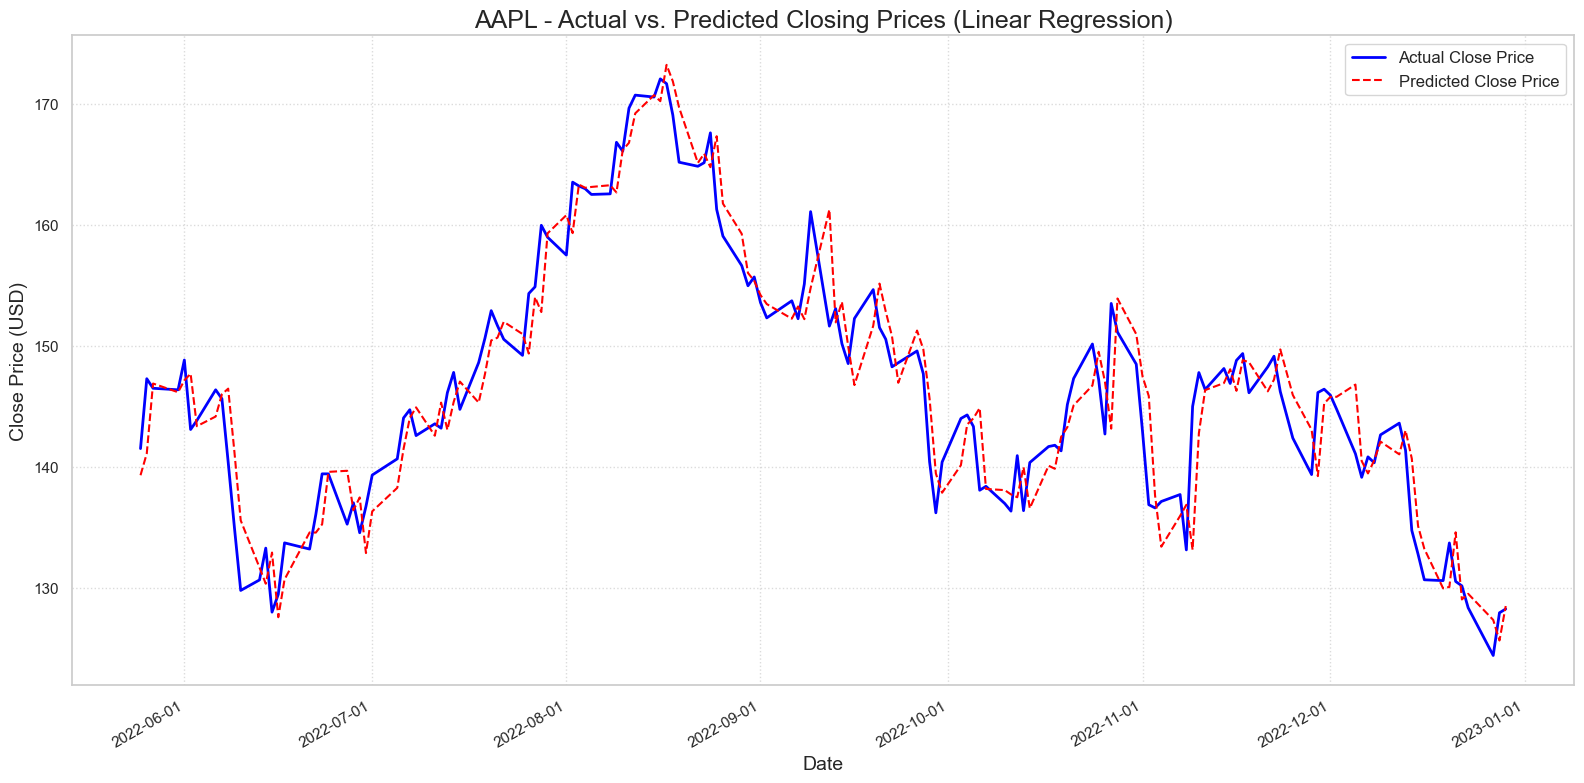

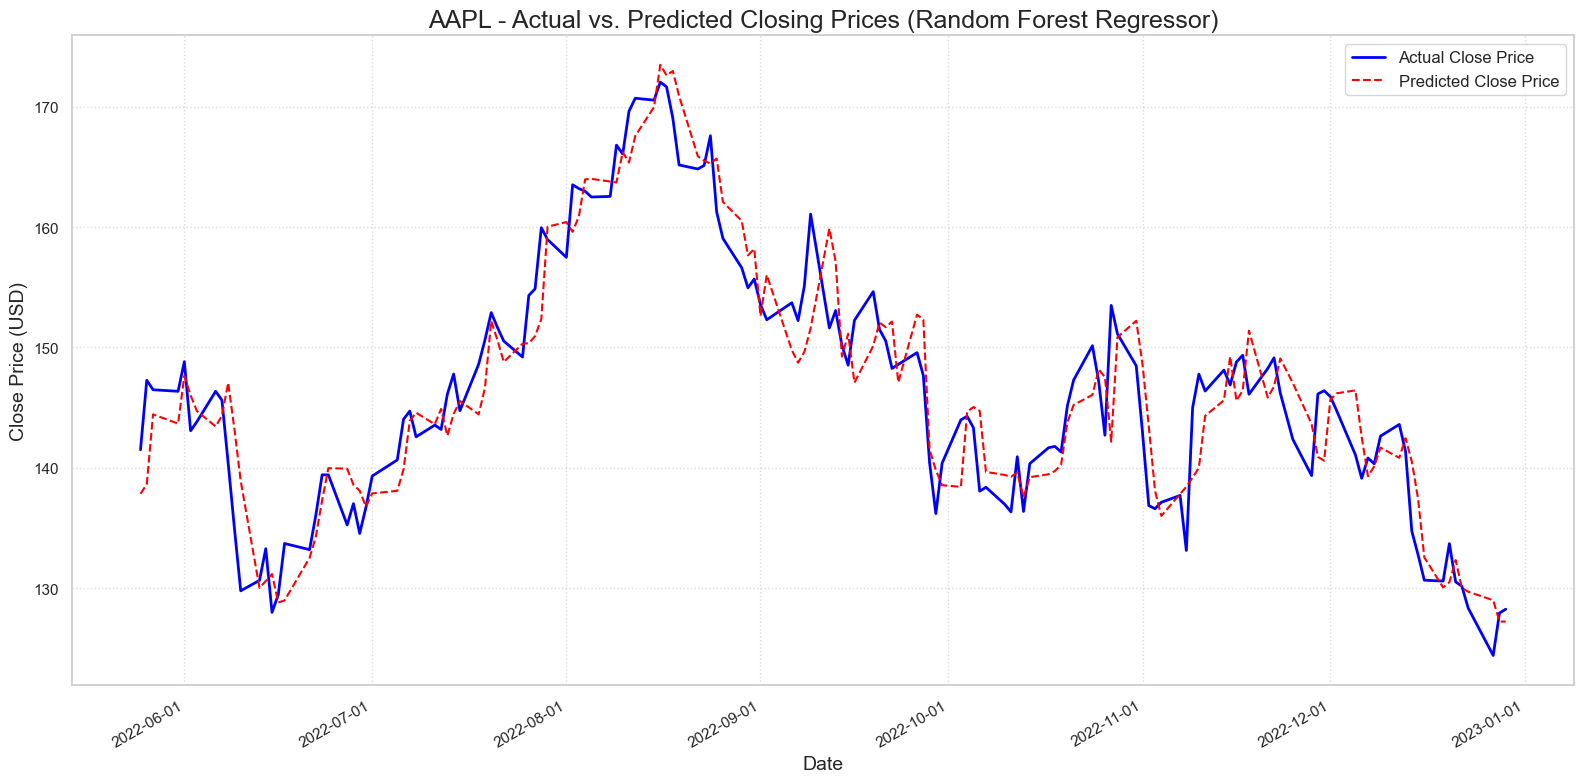

In [32]:
def plot_results(y_true, y_pred, model_name):
    """
    Plots the actual vs. predicted closing prices for a given model.

    Args:
        y_true (pd.Series): The actual closing prices (test set).
        y_pred (np.array): The predicted closing prices.
        model_name (str): The name of the model for the plot title.
    """
    plt.figure(figsize=(16, 8))
    plt.plot(y_true.index, y_true.values, label='Actual Close Price', color='blue', linewidth=2)
    plt.plot(y_true.index, y_pred, label='Predicted Close Price', color='red', linestyle='--', linewidth=1.5)

    plt.title(f'{STOCK_TICKER} - Actual vs. Predicted Closing Prices ({model_name})', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate() 

    plt.tight_layout()
    plt.show()

print("\nGenerating plots for model predictions...")

plot_results(y_test, lr_predictions, "Linear Regression")

plot_results(y_test, rf_predictions, "Random Forest Regressor")